Today, we will be using the Iris dataset to practice some machine learning. A K Nearest Neighbors approach will be used predict the species of the Iris plants. 

In [189]:
%load_ext watermark
%watermark  -d -u -a 'Kojis' -v -p numpy,scipy,matplotlib,sklearn,mlxtend

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Kojis 
last updated: 2019-01-16 

CPython 3.6.7
IPython 7.2.0

numpy 1.15.4
scipy 1.1.0
matplotlib 3.0.2
sklearn 0.20.1
mlxtend 0.13.0


In the first step, we'll load the data from sklearn's datasets and create our X and y variables. We'll be using two features, Petal Length and Petal Width, to predict which species the iris plant is. 

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X, y = iris.data[:, 2:], iris.target # select Petal Length and Petal Width Columns
data = pd.DataFrame(np.column_stack((iris.data, iris.target)), columns = iris.feature_names+['Class Label'])
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Now, let's split the data into training and test data using a 2:1 train to test ratio. We will also stratify on the y variable to preserve the class balance in our dataset. 

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.333333,
                                                    random_state=99,
                                                    stratify=y)

Using the training data, we can graph the petal length vs width and see where the species fall. 

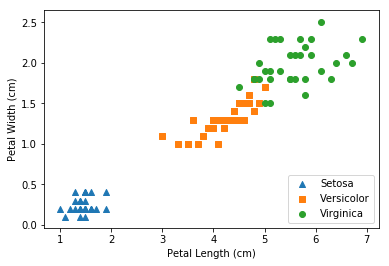

In [192]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='^',
            label='Setosa')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='s',
            label='Versicolor')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='o',
            label='Virginica')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='lower right')

plt.show()

We will be using the K Nearest Neighbors method and using a grid search for hyperparamater optimization. Values 1 through 10 were tested for values of k. For weighting the k nearest neighbors, "Uniform" (weights them equally) and "Distance" (weights them by the inverse of the distance) were tested in the grid search. 

In [193]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier())


param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 11)),
              'kneighborsclassifier__weights':['uniform','distance']}

gsearch = GridSearchCV(pipe,
                       param_grid=param_grid,
                       refit=True,
                       iid=False,
                       cv=5)

gsearch.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'kneighborsclassifier__weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

It appears that k=5 and the 'uniform' weighting measure gave us the best results with our data.

In [194]:
print(gsearch.best_params_)

{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'uniform'}


Let's graph the training data and the decision boundary from the KNN model. 

Train set accuracy: 96.00%


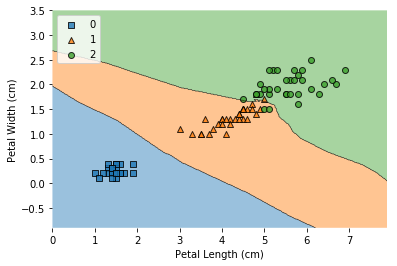

In [195]:
from mlxtend.plotting import plot_decision_regions

y_predictions = gsearch.predict(X_train)

num_correct_predictions = (y_predictions == y_train).sum()
acc = (num_correct_predictions / y_train.shape[0]) * 100
print('Train set accuracy: %.2f%%' % acc)

plot_decision_regions(X_train, y_train, gsearch)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')
plt.show()

Let's graph the new test data and the decision boundary from the KNN model. 

Test set accuracy: 100.00%


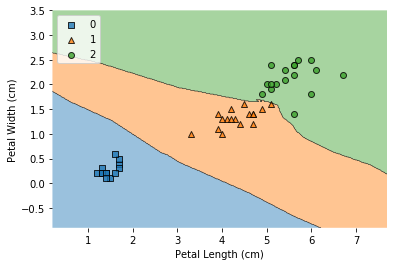

In [197]:
y_predictions = gsearch.predict(X_test)
num_correct_predictions = (y_predictions == y_test).sum()
acc = (num_correct_predictions / y_test.shape[0]) * 100
print('Test set accuracy: %.2f%%' % acc)

plot_decision_regions(X_test, y_test, gsearch)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc='upper left')
plt.show()

When we trained the model, we obtained 96% accuracy score with the training data. When we applied this model to the test data, we actually acheieved a higher 100% accuracy and classified every Iris plant correctly. If we were repeat the experiment using different random seeds and thus different train-test splits, we should expect the test accuracy to be lower and closer to the training accuracy. 